In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cdc = pd.read_csv('/content/drive/MyDrive/brfss2020.csv')

In [3]:
print(cdc.head(20))

    Unnamed: 0  _STATE  FMONTH  ... _SBONTIM _CRCREC1 _AIDTST4
0            0     1.0     1.0  ...      3.0      1.0      1.0
1            1     1.0     1.0  ...      2.0      NaN      NaN
2            2     1.0     1.0  ...      3.0      1.0      2.0
3            3     1.0     1.0  ...      NaN      NaN      2.0
4            4     1.0     1.0  ...      NaN      NaN      9.0
5            5     1.0     1.0  ...      3.0      1.0      1.0
6            6     1.0     1.0  ...      2.0      1.0      2.0
7            7     1.0     1.0  ...      2.0      NaN      NaN
8            8     1.0     1.0  ...      NaN      NaN      2.0
9            9     1.0     1.0  ...      NaN      NaN      2.0
10          10     1.0     1.0  ...      2.0      1.0      1.0
11          11     1.0     1.0  ...      NaN      NaN      2.0
12          12     1.0     1.0  ...      NaN      NaN      NaN
13          13     1.0     1.0  ...      NaN      NaN      2.0
14          14     1.0     1.0  ...      3.0      1.0  

In [4]:
# Variables to explore
cancer_vars = ['_SEX', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG', 
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACEPRV', 'MENTHLTH', 
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR', 
               'CSRVPAIN']

In [5]:
# Subsetting cancer types
cancerType = cdc.loc[cdc.CNCRTYP1.notnull()]

# Proportion of people who have cancer
(len(cancerType)/len(cdc))*100

5.641385418377045

In [6]:
# Subetting for lung cancer
lungCancer = cancerType[cancerType.CNCRTYP1 == 24]

In [7]:
# Matches no. in codebook
lungCancer

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,...,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
9579,9579,4.0,3.0,b'03172020',b'03',b'17',b'2020',1100.0,b'2020000564',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,3.0,NaN,1.000000e+00,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,10.0,88.0,3.0,1.0,1.0,2.0,...,1.0,2.0,13.0,2.0,80.0,6.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,3.0,9.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10379,10379,4.0,7.0,b'07182020',b'07',b'18',b'2020',1100.0,b'2020001364',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,10.0,88.0,88.0,1.0,1.0,2.0,...,1.0,2.0,13.0,2.0,80.0,6.0,63.0,160.0,6713.0,2622.0,3.0,2.0,1.0,4.0,4.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,1.0,1.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10463,10463,4.0,8.0,b'08292020',b'08',b'29',b'2020',1100.0,b'2020001448',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,30.0,88.0,1.0,1.0,2.0,...,1.0,2.0,9.0,1.0,60.0,5.0,65.0,165.0,5307.0,1947.0,2.0,1.0,1.0,2.0,9.0,1.0,2.0,9.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0
10506,10506,4.0,8.0,b'08292020',b'08',b'29',b'2020',1100.0,b'2020001491',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,3.0,NaN,1.000000e+00,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,1.0,2.0,2.0,...,1.0,2.0,13.0,2.0,80.0,6.0,64.0,163.0,7938.0,3004.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10739,10739,4.0,12.0,b'12212020',b'12',b'21',b'2020',1200.0,b'2020001724',2.020002e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,...,1.0,2.0,12.0,2.0,76.0,6.0,69.0,175.0,6804.0,2215.0,2.0,1.0,1.0,2.0,9.0,3.0,1.0,1.0,1.000000e+02,2.0,2.100000e+03,2.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387069,387069,55.0,2.0,b'02242020',b'02',b'24',b'2020',1100.0,b'2020002140',2.020002e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,4.0,2.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,...,1.0,2.0,10.0,2.0,67.0,6.0,61.0,155.0,9072.0,3779.0,4.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,1.0,1.0,9.0,1.0,1.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
387707,387707,55.0,7.0,b'08062020',b'08',b'06',b'2020',1200.0,b'2020002778',2.020003e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,1.0,2.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,...,1.0,2.0,11.0,2.0,71.0,6.0,62.0,157.0,8618.0,3475.0,4.0,2.0,1.0,2.0,9.0,2.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
389616,389616,55.0,11.0,b'11232020',b'11',b'23',b'2020',1100.0,b'2020004687',2.020005e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.

In [8]:
lungCancer = lungCancer[cancer_vars]

In [9]:
lungCancer.head()

,_SEX,_AGEG5YR,_EDUCAG,MARITAL,EMPLOY1,_INCOMG,DECIDE,DIFFWALK,DIFFALON,_RACEPRV,MENTHLTH,PHYSHLTH,POORHLTH,CSRVSUM,CSRVRTRN,CSRVINSR,CSRVPAIN
9579,2.0,13.0,3.0,3.0,7.0,9.0,2.0,1.0,2.0,1.0,88.0,10.0,3.0,NaN,NaN,NaN,2.0
10379,2.0,13.0,4.0,2.0,7.0,4.0,2.0,2.0,2.0,1.0,88.0,10.0,88.0,NaN,NaN,NaN,2.0
10463,2.0,9.0,2.0,1.0,1.0,9.0,2.0,2.0,2.0,1.0,30.0,88.0,88.0,NaN,NaN,NaN,2.0
10506,2.0,13.0,2.0,3.0,7.0,4.0,1.0,2.0,1.0,1.0,88.0,88.0,NaN,NaN,NaN,NaN,2.0
10739,2.0,12.0,2.0,3.0,7.0,9.0,2.0,2.0,2.0,1.0,88.0,88.0,NaN,NaN,NaN,NaN,2.0


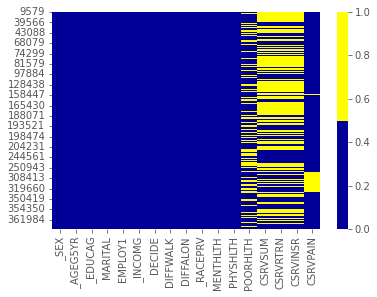

In [10]:
cols = lungCancer.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
for col in lungCancer.columns:
    pct_missing = np.mean(lungCancer[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

_SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACEPRV - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 31.591%
CSRVSUM - 55.0%
CSRVRTRN - 55.0%
CSRVINSR - 55.0%
CSRVPAIN - 9.773%


In [12]:
lungCancer_Ok_csrvsum = lungCancer.loc[(~lungCancer['CSRVSUM'].isnull())]

In [13]:
lungCancer_Ok_csrvsum.shape

(198, 17)

In [14]:
lungCancer_Ok_csrvsum.head()

,_SEX,_AGEG5YR,_EDUCAG,MARITAL,EMPLOY1,_INCOMG,DECIDE,DIFFWALK,DIFFALON,_RACEPRV,MENTHLTH,PHYSHLTH,POORHLTH,CSRVSUM,CSRVRTRN,CSRVINSR,CSRVPAIN
39566,2.0,13.0,4.0,3.0,2.0,9.0,2.0,1.0,2.0,1.0,1.0,88.0,88.0,2.0,1.0,1.0,2.0
39581,2.0,12.0,4.0,1.0,7.0,5.0,2.0,1.0,2.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,2.0
39684,2.0,11.0,3.0,3.0,7.0,5.0,2.0,1.0,2.0,1.0,88.0,88.0,NaN,1.0,1.0,1.0,2.0
39689,2.0,11.0,3.0,2.0,7.0,5.0,2.0,2.0,2.0,1.0,88.0,88.0,NaN,1.0,1.0,1.0,2.0
39986,1.0,13.0,2.0,3.0,7.0,3.0,2.0,2.0,2.0,1.0,1.0,88.0,88.0,1.0,1.0,1.0,2.0


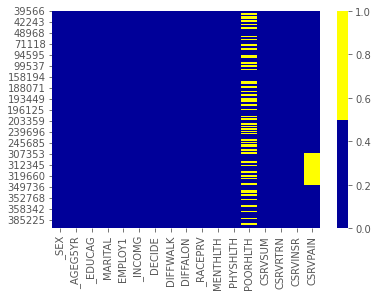

In [15]:
cols = lungCancer_Ok_csrvsum.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvsum[cols].isnull(), cmap=sns.color_palette(colours))

In [16]:
for col in lungCancer_Ok_csrvsum.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvsum[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

_SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACEPRV - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 37.374%
CSRVSUM - 0.0%
CSRVRTRN - 0.0%
CSRVINSR - 0.0%
CSRVPAIN - 14.646%


In [17]:
lungCancer_Ok_csrvrtrn = lungCancer.loc[(~lungCancer['CSRVRTRN'].isnull())]
lungCancer_Ok_csrvrtrn.shape

(198, 17)

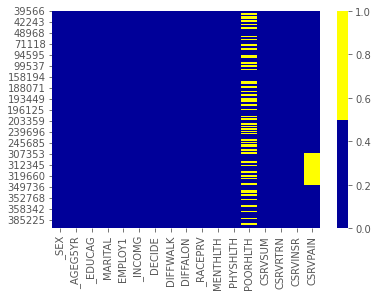

In [18]:
cols = lungCancer_Ok_csrvrtrn.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvrtrn[cols].isnull(), cmap=sns.color_palette(colours))

In [19]:
for col in lungCancer_Ok_csrvrtrn.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvrtrn[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

_SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACEPRV - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 37.374%
CSRVSUM - 0.0%
CSRVRTRN - 0.0%
CSRVINSR - 0.0%
CSRVPAIN - 14.646%


In [20]:
lungCancer_Ok_csrvinsr = lungCancer.loc[(~lungCancer['CSRVINSR'].isnull())]
lungCancer_Ok_csrvinsr.shape

(198, 17)

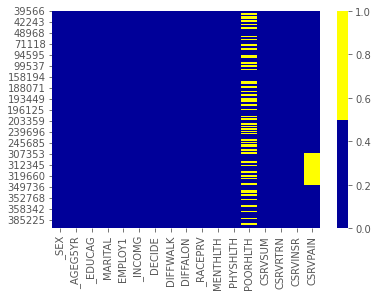

In [21]:
cols = lungCancer_Ok_csrvinsr.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvinsr[cols].isnull(), cmap=sns.color_palette(colours))

In [22]:
for col in lungCancer_Ok_csrvinsr.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvinsr[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

_SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACEPRV - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 37.374%
CSRVSUM - 0.0%
CSRVRTRN - 0.0%
CSRVINSR - 0.0%
CSRVPAIN - 14.646%


In [23]:
lungCancer_Ok_csrvpain = lungCancer.loc[(~lungCancer['CSRVPAIN'].isnull())]
lungCancer_Ok_csrvpain.shape

(397, 17)

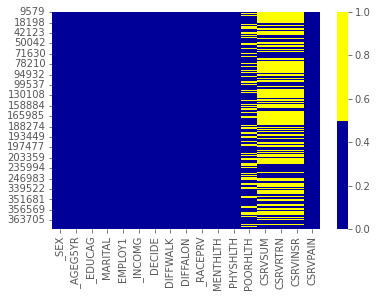

In [24]:
cols = lungCancer_Ok_csrvpain.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvpain[cols].isnull(), cmap=sns.color_palette(colours))

In [25]:
for col in lungCancer_Ok_csrvpain.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvpain[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

_SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACEPRV - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 30.982%
CSRVSUM - 57.431%
CSRVRTRN - 57.431%
CSRVINSR - 57.431%
CSRVPAIN - 0.0%


In [ ]:
drive.flush_and_unmount()